In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from tqdm import trange

In [2]:
!pip install koreanize-matplotlib

import koreanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.9 MB 8.6 MB/s 


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 데이터 로드

In [4]:
날씨별사고 = '/content/drive/MyDrive/data/final_data/기상상태별+교통사고+현황_20221222103347.csv'
시간대별사고 = '/content/drive/MyDrive/data/final_data/시간대별+교통사고+현황_20221222094820.csv'
월별사고 = '/content/drive/MyDrive/data/final_data/월별+교통사고+현황_20221222101150.csv'
차량통행속도 = '/content/drive/MyDrive/data/final_data/차량통행속도(월별_구별)_20221222103124.csv'
월별날씨 = '/content/drive/MyDrive/data/final_data/일기일수_20221223111859.csv'

weahter_acident = pd.read_csv(날씨별사고)
time_acident = pd.read_csv(시간대별사고)
monthly_acident = pd.read_csv(월별사고)
car_speed = pd.read_csv(차량통행속도)
monthly_weather = pd.read_csv(월별날씨)

In [7]:
weahter_acident.shape, time_acident.shape, monthly_acident.shape, car_speed.shape

((183, 7), (339, 7), (27, 38), (27, 14))

# 자치구별 기상상태별

In [ ]:
weahter_acident.head()

,자치구별(1),자치구별(2),기상상태별(1),기상상태별(2),2021,2021.1,2021.2
0,자치구별(1),자치구별(2),기상상태별(1),기상상태별(2),발생건수 (건),사망자 (명),부상자 (명)
1,합계,소계,계,소계,33913,243,45223
2,합계,소계,계,맑음,29717,202,39565
3,합계,소계,계,흐림,1307,18,1724
4,합계,소계,계,비,2018,21,2779


In [8]:
weahter_acident = weahter_acident.drop(columns=['자치구별(1)', '기상상태별(1)'])
weahter_acident = weahter_acident[weahter_acident['자치구별(2)'] != '소계']
weahter_acident.columns = ['자치구', '날씨', '사고건수', '사망자수', '부상자수']
weahter_acident = weahter_acident[weahter_acident['날씨'] != '소계']
weahter_acident = weahter_acident.drop(index=0, axis=0)
weahter_acident = weahter_acident.reset_index(drop=True)

weahter_acident.loc[weahter_acident['사망자수'] == '-', '사망자수'] = 0
weahter_acident.loc[weahter_acident['부상자수'] == '-', '부상자수'] = 0
weahter_acident.loc[weahter_acident['사고건수'] == '-', '사고건수'] = 0
weahter_acident = weahter_acident.fillna(0)

weahter_acident['사망자수'] = weahter_acident['사망자수'].astype(int)
weahter_acident['부상자수'] = weahter_acident['부상자수'].astype(int)
weahter_acident['사고건수'] = weahter_acident['사고건수'].astype(int)

weahter_acident.head()

,자치구,날씨,사고건수,사망자수,부상자수
0,종로구,맑음,691,3,941
1,종로구,흐림,29,1,36
2,종로구,비,47,2,62
3,종로구,안개,0,0,0
4,종로구,눈,3,0,3


In [ ]:
weahter_acident.isnull().sum()

자치구     0
날씨      0
사고건수    0
사망자수    0
부상자수    0
dtype: int64

In [ ]:
weahter_acident['사망자수']

0      3
1      1
2      2
3      0
4      0
      ..
145    2
146    2
147    0
148    0
149    0
Name: 사망자수, Length: 150, dtype: int64

In [ ]:
weahter_acident.describe()

,사고건수,사망자수,부상자수
count,150.000000,150.000000,150.000000
mean,226.086667,1.620000,301.473333
std,496.243512,3.377124,664.726019
min,0.000000,0.000000,0.000000
25%,3.000000,0.000000,4.250000
50%,32.000000,0.000000,45.000000
75%,91.500000,1.000000,121.750000
max,3308.000000,16.000000,4458.000000


In [ ]:
weahter_acident.describe(include = 'object')

,자치구,날씨
count,150,150
unique,25,6
top,종로구,맑음
freq,6,25


In [ ]:
weahter_acident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   자치구     150 non-null    object
 1   날씨      150 non-null    object
 2   사고건수    150 non-null    int64 
 3   사망자수    150 non-null    int64 
 4   부상자수    150 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.0+ KB


In [9]:
weather_sum = weahter_acident.groupby('날씨').sum()
weather_sum

,사고건수,사망자수,부상자수
날씨,,,
기타/불명,677,1,896
눈,193,1,256
맑음,29717,202,39565
비,2018,21,2779
안개,1,0,1
흐림,1307,18,1724


In [10]:
weather_sum['사망확률'] = (weather_sum['사망자수'] / weather_sum['사고건수']) * 100
weather_sum['사고당 부상자'] = (weather_sum['부상자수'] / weather_sum['사고건수'])
weather_sum

,사고건수,사망자수,부상자수,사망확률,사고당 부상자
날씨,,,,,
기타/불명,677,1,896,0.147710,1.323486
눈,193,1,256,0.518135,1.326425
맑음,29717,202,39565,0.679746,1.331393
비,2018,21,2779,1.040634,1.377106
안개,1,0,1,0.000000,1.000000
흐림,1307,18,1724,1.377200,1.319051


In [ ]:
weather_gu = weahter_acident.groupby('자치구').sum()
weather_gu.head()

,사고건수,사망자수,부상자수
자치구,,,
강남구,3820,10,5175
강동구,1047,9,1411
강북구,1017,6,1302
강서구,1501,13,2042
관악구,1419,8,1829


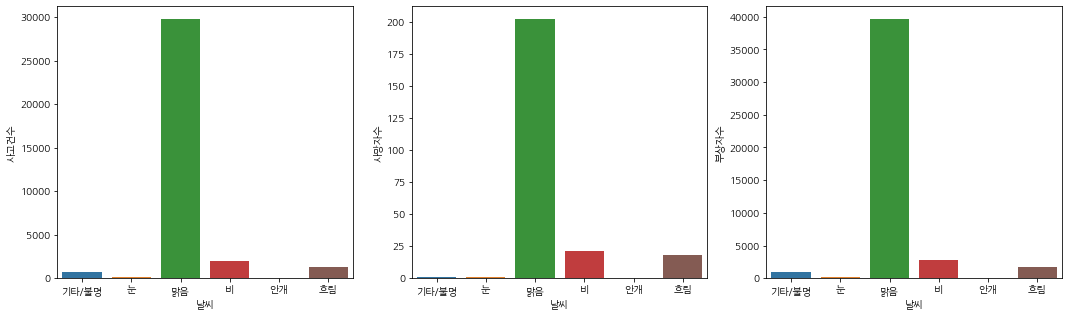

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(18,5))

sns.barplot(data=weather_sum, x=weather_sum.index, y=weather_sum['사고건수'], ax=ax[0])
sns.barplot(data=weather_sum, x=weather_sum.index, y=weather_sum['사망자수'], ax=ax[1])
sns.barplot(data=weather_sum, x=weather_sum.index, y=weather_sum['부상자수'], ax=ax[2])

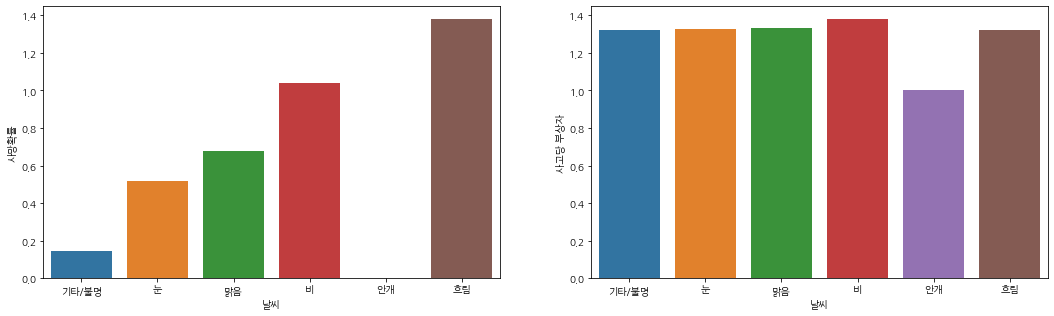

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(18,5))

sns.barplot(data=weather_sum, x=weather_sum.index, y=weather_sum['사망확률'], ax=ax[0])
sns.barplot(data=weather_sum, x=weather_sum.index, y=weather_sum['사고당 부상자'], ax=ax[1])

In [ ]:
weahter_acident.to_csv('/content/drive/MyDrive/data/final_data/weahter_acident_1.csv', encoding='cp949')

In [11]:
weather_sum.to_csv('/content/drive/MyDrive/data/final_data/weather_sum.csv', encoding='cp949')

# 자치구별 시간별 사고통계

In [12]:
time_acident = time_acident.drop(columns=['자치구별(1)', '시간대별(1)'])
time_acident = time_acident[time_acident['자치구별(2)'] != '소계']
time_acident.columns = ['자치구', '시간', '사고건수', '사망자수', '부상자수']
time_acident = time_acident[time_acident['시간'] != '소계']
time_acident = time_acident.drop(index=0, axis=0)
time_acident = time_acident.reset_index(drop=True)

time_acident.loc[time_acident['사망자수'] == '-', '사망자수'] = 0
time_acident.loc[time_acident['부상자수'] == '-', '부상자수'] = 0
time_acident.loc[time_acident['사고건수'] == '-', '사고건수'] = 0

time_acident['사망자수'] = time_acident['사망자수'].astype(int)
time_acident['부상자수'] = time_acident['부상자수'].astype(int)
time_acident['사고건수'] = time_acident['사고건수'].astype(int)

time_acident.head()

,자치구,시간,사고건수,사망자수,부상자수
0,종로구,00시-02시,31,1,43
1,종로구,02시-04시,12,0,15
2,종로구,04시-06시,16,0,20
3,종로구,06시-08시,25,2,30
4,종로구,08시-10시,74,0,89


In [ ]:
time_acident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   자치구     300 non-null    object
 1   시간      300 non-null    object
 2   사고건수    300 non-null    int64 
 3   사망자수    300 non-null    int64 
 4   부상자수    300 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 11.8+ KB


In [ ]:
time_acident.describe()

,사고건수,사망자수,부상자수
count,300.000000,300.00000,300.000000
mean,113.043333,0.81000,150.250000
std,87.171235,0.93281,117.855791
min,6.000000,0.00000,1.000000
25%,47.000000,0.00000,60.000000
50%,100.000000,1.00000,136.000000
75%,147.250000,1.00000,187.500000
max,535.000000,4.00000,724.000000


In [ ]:
time_acident.describe(include = 'object')

,자치구,시간
count,300,300
unique,25,12
top,종로구,00시-02시
freq,12,25


In [ ]:
time_acident['시간'].value_counts()

00시-02시    25
02시-04시    25
04시-06시    25
06시-08시    25
08시-10시    25
10시-12시    25
12시-14시    25
14시-16시    25
16시-18시    25
18시-20시    25
20시-22시    25
22시-24시    25
Name: 시간, dtype: int64

In [13]:
# 주간 08:00 ~ 18:00
# 야간 18:00 ~ 08:00

주야 = []
for row in time_acident['시간']:
    if row == '18시-20시':
        주야.append('야간')
    elif row == '20시-22시':
        주야.append('야간')
    elif row == '22시-24시':
        주야.append('야간')
    elif row == '00시-02시':
        주야.append('야간')
    elif row == '02시-04시':
        주야.append('야간')
    elif row == '04시-06시':
        주야.append('야간')
    elif row == '06시-08시':
        주야.append('야간')
    else:
        주야.append('주간')

time_acident['주야'] = 주야
time_acident.sample(5)

,자치구,시간,사고건수,사망자수,부상자수,주야
53,광진구,10시-12시,93,0,108,주간
278,송파구,04시-06시,37,1,51,야간
9,종로구,18시-20시,101,0,133,야간
293,강동구,10시-12시,94,0,131,주간
207,금천구,06시-08시,39,0,49,야간


In [14]:
time_acident.groupby('주야').mean().style.format('{:,.2f}')

,사고건수,사망자수,부상자수
주야,,,
야간,87.95,0.80,118.32
주간,148.17,0.82,194.95


In [15]:
time_acident.groupby('주야').sum().style.format('{:,}')

,사고건수,사망자수,부상자수
주야,,,
야간,"15,392",140,"20,706"
주간,"18,521",103,"24,369"


In [ ]:
time_acident.groupby(['자치구', '주야']).sum()

사고건수  사망자수  부상자수
자치구  주야                  
강남구  야간  1722     7  2422
     주간  2098     3  2753
강동구  야간   515     6   543
     주간   532     3   722
강북구  야간   473     4   623
     주간   544     2   679
강서구  야간   718     6   998
     주간   783     7  1044
관악구  야간   692     5   894
     주간   727     3   935
광진구  야간   430     4   569
     주간   492     0   647
구로구  야간   632     7   824
     주간   718     2   905
금천구  야간   416     7   563
     주간   411     9   604
노원구  야간   608     7   840
     주간   805     1  1100
도봉구  야간   247     2   334
     주간   344     1   434
동대문구 야간   573     8   694
     주간   817     9   962
동작구  야간   516     6   705
     주간   632     5   815
마포구  야간   549     5   793
     주간   553     9   780
서대문구 야간   432     7   573
     주간   498     2   633
서초구  야간   872     6  1202
     주간  1246     2  1730
성동구  야간   495     5   672
     주간   562     3   690
성북구  야간   565     6   721
     주간   720     9   885
송파구  야간  1158    11  1551
     주간  1449     3  1958
양천구  야간   584     7   767
     주간   721     7   925
영등포구 야간   966     8  1349
     주간  1212     7  1618
용산구  야간   480     2   638
     주간   534     3   731
은평구  야간   401     4   585
     주간   466     7   633
종로구  야간   325     4   444
     주간   453     2   606
중구   야간   417     1   578
     주간   437     2   578
중랑구  야간   606     5   824
     주간   767     2  1002

In [ ]:
time_acident[time_acident['주야']=='주간'].groupby('자치구').sum()

,사고건수,사망자수,부상자수
자치구,,,
강남구,2098,3,2753
강동구,532,3,722
강북구,544,2,679
강서구,783,7,1044
관악구,727,3,935
광진구,492,0,647
구로구,718,2,905
금천구,411,9,604
노원구,805,1,1100


In [ ]:
time_night = time_acident[time_acident['주야']=='야간'].groupby('시간').sum()
time_night

,사고건수,사망자수,부상자수
시간,,,
00시-02시,1116,15,1602
02시-04시,544,16,728
04시-06시,653,20,877
06시-08시,1459,30,1846
18시-20시,4833,21,6348
20시-22시,3748,17,5084
22시-24시,3039,21,4221


In [ ]:
time_day = time_acident[time_acident['주야']=='주간'].groupby('시간').sum()
time_day

,사고건수,사망자수,부상자수
시간,,,
08시-10시,2951,17,3805
10시-12시,3388,27,4440
12시-14시,3972,25,5212
14시-16시,3912,20,5285
16시-18시,4298,14,5627


In [29]:
time_sum = time_acident.groupby('시간').sum()
time_sum

,사고건수,사망자수,부상자수
시간,,,
00시-02시,1116,15,1602
02시-04시,544,16,728
04시-06시,653,20,877
06시-08시,1459,30,1846
08시-10시,2951,17,3805
10시-12시,3388,27,4440
12시-14시,3972,25,5212
14시-16시,3912,20,5285
16시-18시,4298,14,5627


In [31]:
주야 = []
for row in time_sum.index:
    if row == '18시-20시':
        주야.append('야간')
    elif row == '20시-22시':
        주야.append('야간')
    elif row == '22시-24시':
        주야.append('야간')
    elif row == '00시-02시':
        주야.append('야간')
    elif row == '02시-04시':
        주야.append('야간')
    elif row == '04시-06시':
        주야.append('야간')
    elif row == '06시-08시':
        주야.append('야간')
    else:
        주야.append('주간')

time_sum['주야'] = 주야
time_sum

,사고건수,사망자수,부상자수,주야
시간,,,,
00시-02시,1116,15,1602,야간
02시-04시,544,16,728,야간
04시-06시,653,20,877,야간
06시-08시,1459,30,1846,야간
08시-10시,2951,17,3805,주간
10시-12시,3388,27,4440,주간
12시-14시,3972,25,5212,주간
14시-16시,3912,20,5285,주간
16시-18시,4298,14,5627,주간


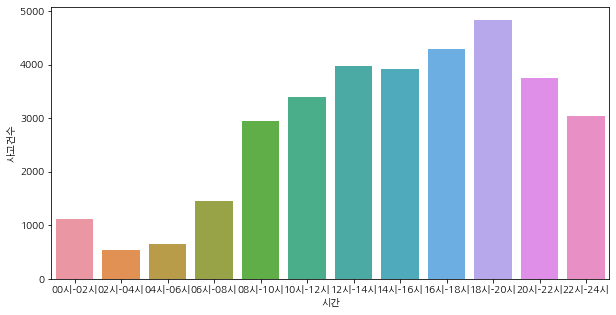

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(data=time_sum, x=time_sum.index, y='사고건수')

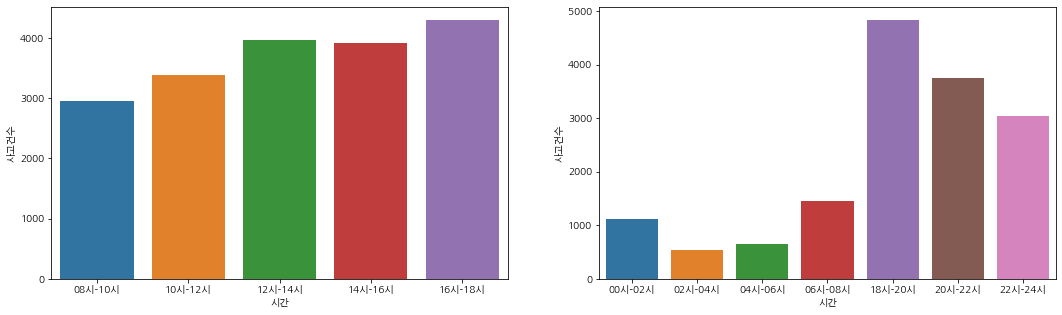

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(18,5))
sns.barplot(data=time_day, x=time_day.index, y='사고건수', ax=ax[0]);
sns.barplot(data=time_night, x=time_night.index, y='사고건수', ax=ax[1]);

In [33]:
time_sum.to_csv('/content/drive/MyDrive/data/final_data/time_sum.csv', encoding='cp949')

# 월별 날씨

In [ ]:
monthly_weather.columns = ['날씨', '1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']
monthly_weather.head()

,날씨,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,맑음,10,9,9,10,4,-,3,1,8,9,8,15
1,구름조금,12,10,9,7,12,16,9,6,7,8,13,9
2,구름많음,5,5,8,4,5,7,13,9,6,6,4,4
3,흐림,4,4,5,9,10,7,6,15,9,8,5,3
4,강수,9,5,9,9,17,13,8,13,8,11,6,9


In [ ]:
monthly_weather = monthly_weather.set_index('날씨')
monthly_weather = monthly_weather.fillna(0)
monthly_weather

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
날씨,,,,,,,,,,,,
맑음,10,9,9,10,4,-,3,1,8,9,8,15
구름조금,12,10,9,7,12,16,9,6,7,8,13,9
구름많음,5,5,8,4,5,7,13,9,6,6,4,4
흐림,4,4,5,9,10,7,6,15,9,8,5,3
강수,9,5,9,9,17,13,8,13,8,11,6,9
서리,6,4,11,2,-,-,-,-,-,1,11,15
안개,1,1,2,-,1,-,-,1,-,-,-,-
눈,9,5,2,-,-,-,-,-,-,-,2,6
뇌전,-,1,-,-,5,6,7,4,2,3,-,-


In [ ]:
for i in range(1, 13):
    monthly_weather.loc[monthly_weather[f'{i}월'] == '-', f'{i}월'] = 0
    monthly_weather[f'{i}월'] = monthly_weather[f'{i}월'].astype(int)

In [ ]:
monthly_weather

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
날씨,,,,,,,,,,,,
맑음,10,9,9,10,4,0,3,1,8,9,8,15
구름조금,12,10,9,7,12,16,9,6,7,8,13,9
구름많음,5,5,8,4,5,7,13,9,6,6,4,4
흐림,4,4,5,9,10,7,6,15,9,8,5,3
강수,9,5,9,9,17,13,8,13,8,11,6,9
서리,6,4,11,2,0,0,0,0,0,1,11,15
안개,1,1,2,0,1,0,0,1,0,0,0,0
눈,9,5,2,0,0,0,0,0,0,0,2,6
뇌전,0,1,0,0,5,6,7,4,2,3,0,0


In [ ]:
# 기타 = 서리 + 뇌전, 눈, 맑음, 비 = 강수, 안개, 흐림 = 구름조금 + 구름많음 + 흐림 + 황사

In [ ]:
monthly_weather_T = monthly_weather.T
monthly_weather_T

날씨,맑음,구름조금,구름많음,흐림,강수,서리,안개,눈,뇌전,황사
1월,10,12,5,4,9,6,1,9,0,2
2월,9,10,5,4,5,4,1,5,1,0
3월,9,9,8,5,9,11,2,2,0,5
4월,10,7,4,9,9,2,0,0,0,2
5월,4,12,5,10,17,0,1,0,5,5
6월,0,16,7,7,13,0,0,0,6,0
7월,3,9,13,6,8,0,0,0,7,0
8월,1,6,9,15,13,0,1,0,4,0
9월,8,7,6,9,8,0,0,0,2,0
10월,9,8,6,8,11,1,0,0,3,0


In [ ]:
monthly_weather.T.sum().sum()

604

In [ ]:
monthly_weather_T['흐림2'] = monthly_weather_T['구름많음'] + monthly_weather_T['흐림'] + monthly_weather_T['황사']
monthly_weather_T['기타'] =  monthly_weather_T['서리'] + monthly_weather_T['뇌전']
monthly_weather_T['맑음2'] = monthly_weather_T['구름조금'] + monthly_weather_T['맑음']
monthly_weather_t = monthly_weather_T[['기타', '눈', '맑음2', '강수', '안개', '흐림2']]
monthly_weather_t

날씨,기타,눈,맑음2,강수,안개,흐림2
1월,6,9,22,9,1,11
2월,5,5,19,5,1,9
3월,11,2,18,9,2,18
4월,2,0,17,9,0,15
5월,5,0,16,17,1,20
6월,6,0,16,13,0,14
7월,7,0,12,8,0,19
8월,4,0,7,13,1,24
9월,2,0,15,8,0,15
10월,4,0,17,11,0,14


In [ ]:
weather = monthly_weather_t.sum() / 604 * 100
weather

날씨
기타     12.913907
눈       3.973510
맑음2    33.774834
강수     19.370861
안개      0.993377
흐림2    28.973510
dtype: float64

In [ ]:
weather_month = monthly_weather_t.T
weather_month

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
날씨,,,,,,,,,,,,
기타,6,5,11,2,5,6,7,4,2,4,11,15
눈,9,5,2,0,0,0,0,0,0,0,2,6
맑음2,22,19,18,17,16,16,12,7,15,17,21,24
강수,9,5,9,9,17,13,8,13,8,11,6,9
안개,1,1,2,0,1,0,0,1,0,0,0,0
흐림2,11,9,18,15,20,14,19,24,15,14,9,7


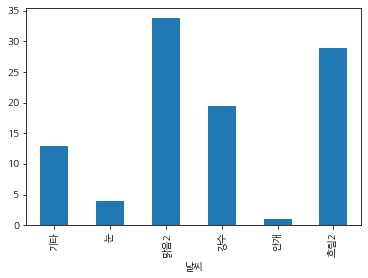

In [ ]:
weather.plot(kind = 'bar')

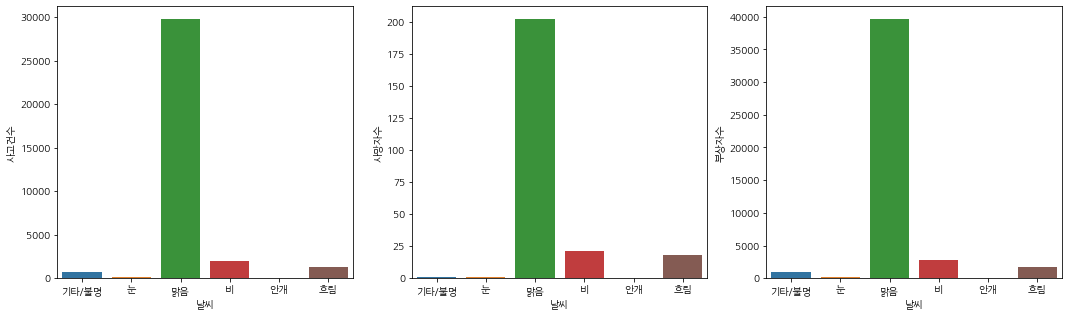

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(18,5))

sns.barplot(data=weather_sum, x=weather_sum.index, y=weather_sum['사고건수'], ax=ax[0])
sns.barplot(data=weather_sum, x=weather_sum.index, y=weather_sum['사망자수'], ax=ax[1])
sns.barplot(data=weather_sum, x=weather_sum.index, y=weather_sum['부상자수'], ax=ax[2])

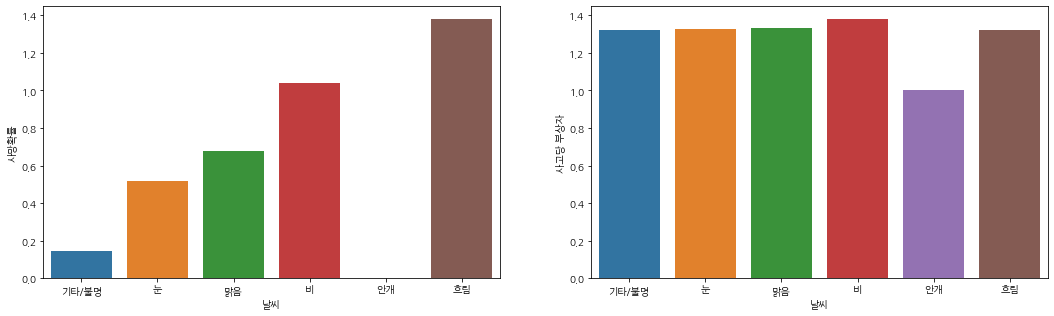

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(18,5))

sns.barplot(data=weather_sum, x=weather_sum.index, y=weather_sum['사망확률'], ax=ax[0])
sns.barplot(data=weather_sum, x=weather_sum.index, y=weather_sum['사고당 부상자'], ax=ax[1])

In [ ]:
weather_month.to_csv('/content/drive/MyDrive/data/final_data/weather_month_1.csv', encoding='cp949')